In [150]:
import os
import subprocess
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

BASE_DIR = os.path.dirname(os.path.realpath('.'))

np.random.seed(42)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [151]:
def get_titanic_dataset():
    """
    To use this function, you must create a kaggle API token
    https://github.com/Kaggle/kaggle-api
    """
    dataset_dir = os.path.join(BASE_DIR, 'datasets', 'titanic')
    train_path = os.path.join(dataset_dir, 'train.csv')
    test_path = os.path.join(dataset_dir, 'test.csv')
    
    data_exists = os.path.isfile(train_path) and os.path.isfile(test_path)
    if not data_exists:
        os.makedirs(dataset_dir, exist_ok=True)
        subprocess.check_call(['kaggle', 'competitions', 'download', '-c', 'titanic', '-p', dataset_dir])
    
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    
    df_train.columns = map(str.lower, df_train.columns)
    df_test.columns = map(str.lower, df_test.columns)
    
    X_train = df_train.drop(columns=['survived'])
    y_train = df_train['survived']
    X_test = df_test
    
    return X_train, y_train, X_test

In [152]:
X_train, y_train, X_test = get_titanic_dataset()

X_train_copy = X_train.copy()
X_train_copy['survived'] = y_train
df_train = X_train_copy

In [153]:
X_train.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
X_train.describe()

,passengerid,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
passengerid    891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [156]:
X_train['ticket'].value_counts().head()

347082      7
1601        7
CA. 2343    7
3101295     6
347088      6
Name: ticket, dtype: int64

In [157]:
X_train['cabin'].value_counts(dropna=False).head()

NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: cabin, dtype: int64

In [158]:
X_train['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [159]:
X_train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [160]:
X_train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [161]:
X_train[X_train['pclass'] == 3]['cabin'].value_counts(dropna=False).head()

NaN      479
G6         4
E121       2
F G73      2
F E69      1
Name: cabin, dtype: int64

In [162]:
X_train[X_train['pclass'] == 2]['cabin'].value_counts(dropna=False).head()

NaN     168
F33       3
D         3
E101      3
F2        3
Name: cabin, dtype: int64

In [163]:
X_train[X_train['pclass'] == 1]['cabin'].value_counts(dropna=False).head()

NaN                40
B96 B98             4
C23 C25 C27         4
C22 C26             3
B57 B59 B63 B66     2
Name: cabin, dtype: int64

In [164]:
y_train.value_counts()

0    549
1    342
Name: survived, dtype: int64

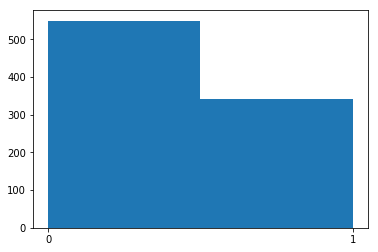

In [165]:
plt.hist(y_train, bins=2)
plt.xticks([0, 1])
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12430d5c0>,
      dtype=object)

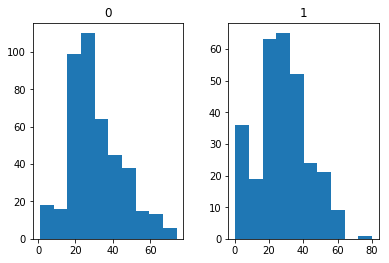

In [166]:
df_train.hist('age', by='survived', xrot=360)

In [167]:
df_train[['survived', 'sibsp', 'parch']].corr()

,survived,sibsp,parch
survived,1.000000,-0.035322,0.081629
sibsp,-0.035322,1.000000,0.414838
parch,0.081629,0.414838,1.000000


In [168]:
multi_cabin_mask = df_train['cabin'].str.contains(' ').fillna(False)
df_train[multi_cabin_mask]['cabin']

27         C23 C25 C27
75               F G73
88         C23 C25 C27
97             D10 D12
118            B58 B60
128              F E69
297            C22 C26
299            B58 B60
305            C22 C26
311    B57 B59 B63 B66
341        C23 C25 C27
390            B96 B98
435            B96 B98
438        C23 C25 C27
498            C22 C26
679        B51 B53 B55
699              F G63
700            C62 C64
715              F G73
742    B57 B59 B63 B66
763            B96 B98
789            B82 B84
802            B96 B98
872        B51 B53 B55
Name: cabin, dtype: object

In [169]:
df_train['cabin'].str[0].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object)

In [170]:
cabin_single = X_train['cabin'].str.split(' ').str[-1]

X_train['deck'] = cabin_single.str[0]
X_train['room_number'] = pd.to_numeric(cabin_single.str[1:])

In [171]:
alone_mask = (X_train['sibsp'] == 0) & (X_train['parch'] == 0)

df_train_copy = df_train.copy()
df_train_copy['alone'] = alone_mask
df_train_copy[['alone', 'survived']].corr()

,alone,survived
alone,1.000000,-0.203367
survived,-0.203367,1.000000


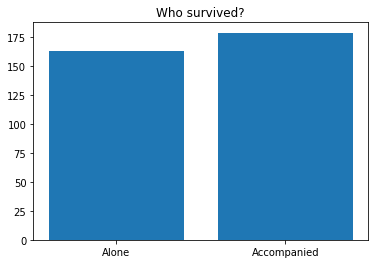

In [172]:
num_alone_survivors = (df_train_copy['alone'] & df_train_copy['survived']).sum()
num_accompanied_survivors = ((df_train_copy['alone'] == False) & df_train_copy['survived']).sum()

plt.bar(['Alone', 'Accompanied'], [num_alone_survivors, num_accompanied_survivors], align='center')
plt.title('Who survived?')
plt.show()

In [173]:
X_train['is_alone'] = (X_train['sibsp'] == 0) & (X_train['parch'] == 0)

In [174]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
res = enc.fit_transform(df_train[['sex']])
df_sex = pd.DataFrame(res, columns=enc.get_feature_names(['sex']))

pd.concat([df_train, df_sex], axis=1)[['pclass', 'survived', 'sex_male', 'sex_female']].corr()

,pclass,survived,sex_male,sex_female
pclass,1.000000,-0.338481,0.131900,-0.131900
survived,-0.338481,1.000000,-0.543351,0.543351
sex_male,0.131900,-0.543351,1.000000,-1.000000
sex_female,-0.131900,0.543351,-1.000000,1.000000


In [175]:
X_train['family_name'] = X_train['name'].str.lower().str.split(',').str[0]
family_name_count = X_train.groupby('family_name').count()['passengerid'].loc[X_train['family_name']]
X_train['family_name_count'] = family_name_counts.values
X_train.sort_values(by='family_name_count', ascending=False).head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck,room_number,is_alone,family_name,family_name_count
146,147,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,NaN,NaN,True,andersson,9
68,69,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,NaN,NaN,False,andersson,9
610,611,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,False,andersson,9
119,120,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,NaN,NaN,False,andersson,9
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,NaN,NaN,False,andersson,9


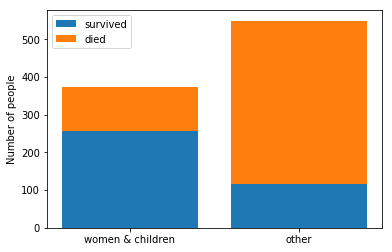

In [224]:
women_and_children = df_train.loc[(X_train.sex == 'female')|(X_train.age < 18)]
not_women_and_children = df_train.loc[~df_train.passengerid.isin(women_and_children.passengerid)]

wacs   = women_and_children.survived.sum()
wacns  = len(women_and_children.index) - wacs

nwacs  = not_women_and_children.survived.sum()
nwacns = len(not_women_and_children.index) - nwacs

survived = [wacs, wacns]
died = [wacns, nwacns]

ind = range(2)

plt.bar(ind, survived)
plt.bar(ind, died, bottom=survived)

plt.ylabel('Number of people')
plt.xticks(ind, ['women & children', 'other'])
plt.legend(['survived', 'died'])

plt.show()

In [231]:
women_and_children_passengerid = X_train.loc[(X_train.sex == 'female')|(X_train.age < 18)].passengerid
X_train['is_woman_or_child'] = X_train.passengerid.isin(women_and_children_passengerid)

In [232]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
num_cols = ['age', 'sibsp', 'parch', 'fare', 'room_number', 'family_name_count']
num_feature_names = [c.lower() for c in num_cols]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse=False))
])

cat_cols = ['pclass', 'sex', 'embarked', 'deck']
cat_pipeline.fit_transform(X_train[cat_cols])
_, enc = cat_pipeline.steps[-1]
cat_feature_names = list(enc.get_feature_names([c.lower() for c in cat_cols]))

bool_cols = ['is_alone', 'is_woman_or_child']

train_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
    ('bool', 'passthrough', bool_cols)
])

train_pipeline_feature_names = num_feature_names + cat_feature_names + bool_cols

X_train_prep = train_pipeline.fit_transform(X_train)

In [233]:
pd.DataFrame(X_train_prep, columns=train_pipeline_feature_names).head()

,age,sibsp,parch,fare,room_number,family_name_count,pclass_1,pclass_2,pclass_3,sex_female,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,is_alone,is_woman_or_child
0,-0.565736,0.432793,-0.473674,-0.502445,-0.103418,0.079241,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.663861,0.432793,-0.473674,0.786845,2.361621,-0.593173,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.103418,-0.593173,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.433312,0.432793,-0.473674,0.420730,4.591895,0.079241,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.433312,-0.474545,-0.473674,-0.486337,-0.103418,0.079241,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [234]:
train_pipeline_feature_names

['age',
 'sibsp',
 'parch',
 'fare',
 'room_number',
 'family_name_count',
 'pclass_1',
 'pclass_2',
 'pclass_3',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_T',
 'is_alone',
 'is_woman_or_child']

In [235]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prep, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

sgd_scores = cross_val_score(sgd_clf, X_train_prep, y_train, cv=10)
sgd_scores.mean()

0.7552233004199296

In [237]:
y_pred = cross_val_predict(sgd_clf, X_train_prep, y_train, cv=10)
confusion_matrix(y_train, y_pred)

array([[447, 102],
       [116, 226]])

In [238]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred)

0.6746268656716418

In [239]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train_prep, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [240]:
svm_scores = cross_val_score(svm_clf, X_train_prep, y_train, cv=10)
svm_scores.mean()

0.8282981500397231

In [241]:
y_pred = cross_val_predict(svm_clf, X_train_prep, y_train, cv=10)
f1_score(y_train, y_pred)

0.7649769585253456

In [242]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train_prep, y_train, cv=10)
forest_scores.mean()

0.8239288956985586

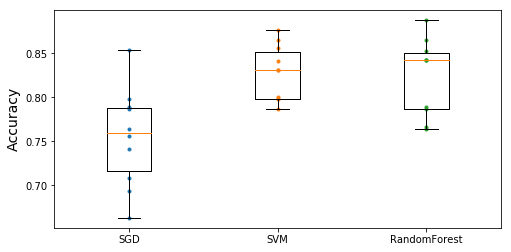

In [243]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, sgd_scores, '.')
plt.plot([2]*10, svm_scores, '.')
plt.plot([3]*10, forest_scores, '.')
plt.boxplot([sgd_scores, svm_scores, forest_scores], labels=("SGD", "SVM", "RandomForest"))
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [244]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': [3, None],
    'n_estimators': randint(1, 200),
    'max_features': randint(1, 11),
    'min_samples_split': randint(2, 11),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rand_forest_search = RandomizedSearchCV(forest_clf, param_distributions, n_iter=25, scoring='accuracy', n_jobs=-1,
                                        cv=10, verbose=True, random_state=42)
rand_forest_search.fit(X_train_prep, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.2s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'max_depth': [3, None], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x125f995f8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x125f99cc0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x125973d30>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
      

In [245]:
rand_forest_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 9,
 'min_samples_split': 4,
 'n_estimators': 51}

In [246]:
rand_forest_search.best_score_

0.8316498316498316

In [247]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1., 3., 10., 30.],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [1, 3, 10, 30],
    'gamma': ['auto']
}

svm_grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', n_jobs=-1, cv=10, verbose=1)
svm_grid_search.fit(X_train_prep, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    8.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1.0, 3.0, 10.0, 30.0], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'degree': [1, 3, 10, 30], 'gamma': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [248]:
svm_grid_search.best_score_

0.8305274971941639